# Decision Tree using Iris Dataset
### Name: Wendy Cahya Kurniawan
### ID      : 109618402



Classification Tree


<ipython-input-1-e21214c6c337>:177: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X[105:150, 0],X[105:150, 1],alpha=1,c='',marker='o',s=100,label='test set',edgecolor='black')


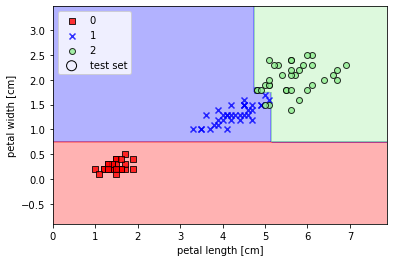

 if X[1] <= 0.75
    then {value: 0, samples: 35}
    else if X[0] <= 4.75
        then {value: 1, samples: 30}
        else if X[0] <= 5.15
            then if X[1] <= 1.85
                then if X[1] <= 1.75
                    then {value: 1, samples: 6}
                    else {value: 2, samples: 4}
                else {value: 2, samples: 5}
            else {value: 2, samples: 25}
This Classification Tree Prediction Accuracy:    0.9777777777777777


In [1]:
import numpy as np

change = 0
count = 1
class D3(object):
    def __init__(self, tree = 'cls', criterion = 'gini', prune = 'depth', max_depth = 4, min_criterion = 0.05):
        self.feature = None
        self.label = None
        self.n_samples = None
        self.gain = None
        self.left = None
        self.right = None
        self.threshold = None
        self.depth = 0

        self.root = None
        self.criterion = criterion
        self.prune = prune
        self.max_depth = max_depth
        self.min_criterion = min_criterion
        self.tree = tree

    def fit(self, features, target):
        self.root = D3()
        if(self.tree == 'cls'):
            self.root._grow_tree(features, target, self.criterion)
        else:
            self.root._grow_tree(features, target, 'mse')
        self.root._prune(self.prune, self.max_depth, self.min_criterion, self.root.n_samples)

    def predict(self, features):
        return np.array([self.root._predict(f) for f in features])

    def print_tree(self):
        self.root._show_tree(0, ' ')

    def _grow_tree(self, features, target, criterion = 'gini'):
        global count
        global change
        self.n_samples = features.shape[0] 

        if len(np.unique(target)) == 1:
            self.label = target[0]
            return

        best_gain = 0.0
        best_feature = None
        best_threshold = None

        if criterion in {'gini', 'entropy'}:
            self.label = max([(c, len(target[target == c])) for c in np.unique(target)], key = lambda x : x[1])[0]
        else:
            self.label = np.mean(target)

        impurity_node = self._calc_impurity(criterion, target)
        
        for col in range(features.shape[1]):
            thre = []
            if count <= 2:
                col = 1
                count = count + 1
            if count > 2 and count <= 4:
                col = 0
                count = count + 1
                
            feature_level = np.unique(features[:,col])
            thresholds = (feature_level[:-1] + feature_level[1:]) / 2.0

            for threshold in thresholds:
                target_l = target[features[:,col] <= threshold]
                impurity_l = self._calc_impurity(criterion, target_l)
                n_l = float(target_l.shape[0]) / self.n_samples

                target_r = target[features[:,col] > threshold]
                impurity_r = self._calc_impurity(criterion, target_r)
                n_r = float(target_r.shape[0]) / self.n_samples

                impurity_gain = impurity_node - (n_l * impurity_l + n_r * impurity_r)
                if impurity_gain > best_gain:
                    best_gain = impurity_gain
                    best_feature = col
                    best_threshold = threshold
                    change = 1
        if change == 1:
            change = 0
            self.feature = best_feature
            self.gain = best_gain
            self.threshold = best_threshold
            self._split_tree(features, target, criterion)

    def _split_tree(self, features, target, criterion):
        features_l = features[features[:, self.feature] <= self.threshold]
        target_l = target[features[:, self.feature] <= self.threshold]
        self.left = D3()
        self.left.depth = self.depth + 1
        self.left._grow_tree(features_l, target_l, criterion)

        features_r = features[features[:, self.feature] > self.threshold]
        target_r = target[features[:, self.feature] > self.threshold]
        self.right = D3()
        self.right.depth = self.depth + 1
        self.right._grow_tree(features_r, target_r, criterion)

    def _calc_impurity(self, criterion, target):
        if criterion == 'gini':
            return 1.0 - sum([(float(len(target[target == c])) / float(target.shape[0])) ** 2.0 for c in np.unique(target)])
        elif criterion == 'mse':
            return np.mean((target - np.mean(target)) ** 2.0)
        else:
            entropy = 0.0
            for c in np.unique(target):
                p = float(len(target[target == c])) / target.shape[0]
                if p > 0.0:
                    entropy -= p * np.log2(p)
            return entropy            

    def _prune(self, method, max_depth, min_criterion, n_samples):
        if self.feature is None:
            return

        self.left._prune(method, max_depth, min_criterion, n_samples)
        self.right._prune(method, max_depth, min_criterion, n_samples)

        pruning = False

        if method == 'impurity' and self.left.feature is None and self.right.feature is None: 
            if (self.gain * float(self.n_samples) / n_samples) < min_criterion:
                pruning = True
        elif method == 'depth' and self.depth >= 5:
            pruning = True

        if pruning is True:
            self.left = None
            self.right = None
            self.feature = None

    def _predict(self, d):
        if self.feature != None:
            if d[self.feature] <= self.threshold:
                return self.left._predict(d)
            else:
                return self.right._predict(d)
        else: 
            return self.label

    def _show_tree(self, depth, cond):
        base = '    ' * depth + cond
        if self.feature != None:
            print(base + 'if X[' + str(self.feature) + '] <= ' + str(self.threshold))
            self.left._show_tree(depth+1, 'then ')
            self.right._show_tree(depth+1, 'else ')
        else:
            print(base + '{value: ' + str(self.label) + ', samples: ' + str(self.n_samples) + '}')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier):
 # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'white', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),np.arange(x2_min, x2_max, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
    plt.scatter(X[105:150, 0],X[105:150, 1],alpha=1,c='',marker='o',s=100,label='test set',edgecolor='black')


def Iris_DecisionTree():
    print('\n\nClassification Tree')
    iris = load_iris()
    X, y = iris.data[:150, [2, 3]], iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    cls = D3(tree = 'cls', criterion = 'entropy', prune = 'depth', max_depth = 3)
    cls.fit(X_train, y_train)
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    plot_decision_regions(X_train,y_train,classifier=cls)
    plt.xlabel('petal length [cm]')
    plt.ylabel('petal width [cm]')
    plt.legend(loc='upper left')
    plt.show()
    
    cls.print_tree()

    pred = cls.predict(X_test)
    print("This Classification Tree Prediction Accuracy:    {}".format(sum(pred == y_test) / len(pred)))
    
Iris_DecisionTree()